In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv("ProjectTweets.csv")

In [30]:
df.head() # let's see what we are dealing with

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [31]:
# Create a new DataFrame with the first row containing the original column names
new_row = pd.DataFrame([df.columns], columns=df.columns)

# Concatenate the new row with the original DataFrame
df = pd.concat([new_row, df], ignore_index=True)
df.drop(columns=['0'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [32]:
df.columns = ["tweet_id", "date", "flag", "user", "text"]
df.head()

,tweet_id,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tweet_id  1600000 non-null  object
 1   date      1600000 non-null  object
 2   flag      1600000 non-null  object
 3   user      1600000 non-null  object
 4   text      1600000 non-null  object
dtypes: object(5)
memory usage: 61.0+ MB


In [62]:
# remove commas for csv split
df['text'] = df['text'].str.replace(',', '')

In [63]:
# testing
contains_char = df['text'].str.contains(',')
count = contains_char.sum()
print(f"Number of rows: {count}")

Number of rows: 0


In [64]:
# exporting csv to store on HBASE
df.to_csv("tweets.csv", header=False, index=False, sep=',')

### Loading data into MongoDB (NoSql)
Not working. Only to demostrate the evaluation process

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, TimestampType
from pyspark.sql.functions import to_timestamp

In [8]:
spark = SparkSession.builder.appName("MongoDB") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12-10.2.0") \
    .config("spark.mongodb.connection.uri", "mongodb://localhost:27017/") \
    .config("spark.mongodb.database", "twitter_db") \
    .config("spark.mongodb.collection", "tweets") \
    .getOrCreate()

23/10/22 12:46:25 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [9]:
spark.stop() #need to stop and restart to have a fresh new session

In [10]:
spark = SparkSession.builder.appName("MongoDB") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12-10.2.0") \
    .config("spark.mongodb.connection.uri", "mongodb://localhost:27017/") \
    .config("spark.mongodb.database", "twitter_db") \
    .config("spark.mongodb.collection", "tweets") \
    .getOrCreate()

In [11]:
print(spark.sparkContext.getConf().toDebugString())

spark.app.id=local-1697975211175
spark.app.name=MongoDB
spark.app.startTime=1697975210785
spark.app.submitTime=1697975158225
spark.driver.extraJavaOptions=-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false
spark.driver.host=10.0.2.15
spark.driver

In [12]:
print(f'The PySpark {spark.version} version is running...')

The PySpark 3.5.0 version is running...


In [13]:
my_schema = StructType([ StructField("n/a", StringType(), True)\
                   ,StructField("tweet_id", StringType(), True)\
                      ,StructField("date", StringType(), True)\
                      ,StructField("flag", StringType(), True)\
                      ,StructField("user", StringType(), True)\
                      ,StructField("text", StringType(), True)])

In [14]:
data = spark.createDataFrame(df, schema=my_schema)

In [13]:
data.show(5)

2023-10-19 15:27:24,448 WARN scheduler.TaskSetManager: Stage 0 contains a task of very large size (194599 KiB). The maximum recommended task size is 1000 KiB.


+---+----------+--------------------+--------+---------------+--------------------+
|n/a|  tweet_id|                date|    flag|           user|                text|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [15]:
data.write.format("mongodb").mode("append").save()

23/10/22 12:47:41 WARN TaskSetManager: Stage 0 contains a task of very large size (194602 KiB). The maximum recommended task size is 1000 KiB.
23/10/22 12:47:48 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 0 (TID 0): Attempting to kill Python Worker
23/10/22 12:47:48 ERROR Executor: Exception in task 0.0 in stage 0.0 (TID 0)
java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.encoders.RowEncoder$.apply(Lorg/apache/spark/sql/types/StructType;)Lorg/apache/spark/sql/catalyst/encoders/ExpressionEncoder;
	at com.mongodb.spark.sql.connector.schema.InternalRowToRowFunction.<init>(InternalRowToRowFunction.java:44)
	at com.mongodb.spark.sql.connector.schema.RowToBsonDocumentConverter.<init>(RowToBsonDocumentConverter.java:84)
	at com.mongodb.spark.sql.connector.write.MongoDataWriter.<init>(MongoDataWriter.java:74)
	at com.mongodb.spark.sql.connector.write.MongoDataWriterFactory.createWriter(MongoDataWriterFactory.java:53)
	at org.apache.spark.sql.execution.data

Py4JJavaError: An error occurred while calling o132.save.
: org.apache.spark.SparkException: Writing job failed.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.writingJobFailedError(QueryExecutionErrors.scala:902)
	at org.apache.spark.sql.execution.datasources.v2.V2TableWriteExec.writeWithV2(WriteToDataSourceV2Exec.scala:411)
	at org.apache.spark.sql.execution.datasources.v2.V2TableWriteExec.writeWithV2$(WriteToDataSourceV2Exec.scala:359)
	at org.apache.spark.sql.execution.datasources.v2.AppendDataExec.writeWithV2(WriteToDataSourceV2Exec.scala:225)
	at org.apache.spark.sql.execution.datasources.v2.V2ExistingTableWriteExec.run(WriteToDataSourceV2Exec.scala:337)
	at org.apache.spark.sql.execution.datasources.v2.V2ExistingTableWriteExec.run$(WriteToDataSourceV2Exec.scala:336)
	at org.apache.spark.sql.execution.datasources.v2.AppendDataExec.run(WriteToDataSourceV2Exec.scala:225)
	at org.apache.spark.sql.execution.datasources.v2.V2CommandExec.result$lzycompute(V2CommandExec.scala:43)
	at org.apache.spark.sql.execution.datasources.v2.V2CommandExec.result(V2CommandExec.scala:43)
	at org.apache.spark.sql.execution.datasources.v2.V2CommandExec.executeCollect(V2CommandExec.scala:49)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:312)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:248)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (10.0.2.15 executor driver): java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.encoders.RowEncoder$.apply(Lorg/apache/spark/sql/types/StructType;)Lorg/apache/spark/sql/catalyst/encoders/ExpressionEncoder;
	at com.mongodb.spark.sql.connector.schema.InternalRowToRowFunction.<init>(InternalRowToRowFunction.java:44)
	at com.mongodb.spark.sql.connector.schema.RowToBsonDocumentConverter.<init>(RowToBsonDocumentConverter.java:84)
	at com.mongodb.spark.sql.connector.write.MongoDataWriter.<init>(MongoDataWriter.java:74)
	at com.mongodb.spark.sql.connector.write.MongoDataWriterFactory.createWriter(MongoDataWriterFactory.java:53)
	at org.apache.spark.sql.execution.datasources.v2.WritingSparkTask.run(WriteToDataSourceV2Exec.scala:436)
	at org.apache.spark.sql.execution.datasources.v2.WritingSparkTask.run$(WriteToDataSourceV2Exec.scala:425)
	at org.apache.spark.sql.execution.datasources.v2.DataWritingSparkTask$.run(WriteToDataSourceV2Exec.scala:491)
	at org.apache.spark.sql.execution.datasources.v2.V2TableWriteExec.$anonfun$writeWithV2$2(WriteToDataSourceV2Exec.scala:388)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.sql.execution.datasources.v2.V2TableWriteExec.writeWithV2(WriteToDataSourceV2Exec.scala:385)
	... 44 more
	Suppressed: com.mongodb.spark.sql.connector.exceptions.DataException: Write aborted for: abace19c-5cb2-43f0-8f1a-ee66e0a52f9f. 0/1 tasks completed.
		at com.mongodb.spark.sql.connector.write.MongoBatchWrite.abort(MongoBatchWrite.java:91)
		at org.apache.spark.sql.execution.datasources.v2.V2TableWriteExec.writeWithV2(WriteToDataSourceV2Exec.scala:406)
		... 44 more
Caused by: java.lang.NoSuchMethodError: org.apache.spark.sql.catalyst.encoders.RowEncoder$.apply(Lorg/apache/spark/sql/types/StructType;)Lorg/apache/spark/sql/catalyst/encoders/ExpressionEncoder;
	at com.mongodb.spark.sql.connector.schema.InternalRowToRowFunction.<init>(InternalRowToRowFunction.java:44)
	at com.mongodb.spark.sql.connector.schema.RowToBsonDocumentConverter.<init>(RowToBsonDocumentConverter.java:84)
	at com.mongodb.spark.sql.connector.write.MongoDataWriter.<init>(MongoDataWriter.java:74)
	at com.mongodb.spark.sql.connector.write.MongoDataWriterFactory.createWriter(MongoDataWriterFactory.java:53)
	at org.apache.spark.sql.execution.datasources.v2.WritingSparkTask.run(WriteToDataSourceV2Exec.scala:436)
	at org.apache.spark.sql.execution.datasources.v2.WritingSparkTask.run$(WriteToDataSourceV2Exec.scala:425)
	at org.apache.spark.sql.execution.datasources.v2.DataWritingSparkTask$.run(WriteToDataSourceV2Exec.scala:491)
	at org.apache.spark.sql.execution.datasources.v2.V2TableWriteExec.$anonfun$writeWithV2$2(WriteToDataSourceV2Exec.scala:388)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


### Data Processing with MapReduce/Spark
- Load data into Hbase from csv
- Run Map-Reduce jobs on the tweets data to get insights and pre process the data (ex: removing empty fields)
- Write the output file back to Hbase for further work

Please refer to the report and attached python scripts for additional details on those steps.

### Working with Post Processed Data
##### Option 1 - Reading data from Hbase

In [8]:
import happybase

In [14]:
# Connect to HBase
connection = happybase.Connection('localhost')
table = connection.table('processed_tweets')

In [15]:
%%time

# Read data from HBase
data = []
for key, value in table.scan():
    row = {'row_key': key.decode()}
    for column, val in value.items():
        column_name = column.decode().split(':')[1]
        row[column_name] = val.decode()
    data.append(row)

CPU times: user 1min 9s, sys: 2.05 s, total: 1min 11s
Wall time: 2min 11s


In [16]:
%%time
df_hb = pd.DataFrame(data)

CPU times: user 4.46 s, sys: 834 ms, total: 5.3 s
Wall time: 13.5 s


In [17]:
df_hb.head(3)

,row_key,date,sentiment_classification,sentiment_score,text,user
0,1,Fri Apr 17 20:30:31 PDT 2009,negative\t,-0.4458,Working songg aunt nan kinda hard crying I write,xoLovebug224
1,10,Fri Apr 17 20:30:47 PDT 2009,negative\t,-0.4767,USEOFFORCEENT sorry loss honey I hope hurt hea...,customcanvasart
2,100,Fri Apr 17 20:32:16 PDT 2009,neutral\t,0.0,IAmCastiel Get rest,taintedmango


##### Option 2 - Reading data from Hadoop using Spark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("Tweets").getOrCreate()

23/10/27 16:56:01 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
%%time
data_s = spark.read.csv("hdfs:///CA/sentiment/part-00000")

CPU times: user 8.18 ms, sys: 651 µs, total: 8.83 ms
Wall time: 16.5 s


In [5]:
%%time
df_spark = data_s.toPandas()

CPU times: user 14.1 s, sys: 734 ms, total: 14.8 s
Wall time: 44.1 s


In [6]:
df_spark.head(3)

,_c0,_c1,_c2,_c3,_c4,_c5
0,1,Fri Apr 17 20:30:31 PDT 2009,xoLovebug224,Working songg aunt nan kinda hard crying I write,-0.4458,negative\t
1,10,Fri Apr 17 20:30:47 PDT 2009,customcanvasart,USEOFFORCEENT sorry loss honey I hope hurt hea...,-0.4767,negative\t
2,100,Fri Apr 17 20:32:16 PDT 2009,taintedmango,IAmCastiel Get rest,0.0,neutral\t


### Time Series - Data Understanding

In [26]:
#df_hb.to_csv('file.csv', index=False)

Understanding and exploring data:
- Plot
- Seasonal Decomposition (trend, seasonality, residual/noise)
- Stationary or Non-stationary
- Autocorrelation

In [2]:
df_hb = pd.read_csv("file.csv")
df_hb.head()

,row_key,date,sentiment_classification,sentiment_score,text,user
0,1,Fri Apr 17 20:30:31 PDT 2009,negative\t,-0.4458,Working songg aunt nan kinda hard crying I write,xoLovebug224
1,10,Fri Apr 17 20:30:47 PDT 2009,negative\t,-0.4767,USEOFFORCEENT sorry loss honey I hope hurt hea...,customcanvasart
2,100,Fri Apr 17 20:32:16 PDT 2009,neutral\t,0.0000,IAmCastiel Get rest,taintedmango
3,1000,Fri Apr 17 21:17:34 PDT 2009,positive\t,0.1027,race witch mountain hope gewt,lilpoppett
4,10000,Fri Jun 05 10:16:52 PDT 2009,positive\t,0.7650,JoeJGirl2009 good lolz,xJoeJonasGirlx


In [10]:
print('Polarity distribution:\n')
print(df_hb['sentiment_classification'].value_counts())

Polarity distribution:

positive\t    760036
neutral\t     445879
negative\t    394085
Name: sentiment_classification, dtype: int64


In [3]:
df = df_hb.drop(columns=['row_key', 'sentiment_classification', 'text', 'user'])

In [4]:
df['date'] = df['date'].str.replace(' PDT', '')
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y')

In [5]:
df.set_index('date', inplace=True)

In [6]:
df.sort_index(inplace=True)

In [7]:
df.head()

,sentiment_score
date,
2009-04-06 22:19:45,-0.3818
2009-04-06 22:19:49,-0.7269
2009-04-06 22:19:53,0.4939
2009-04-06 22:19:57,-0.2500
2009-04-06 22:19:57,-0.4939


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

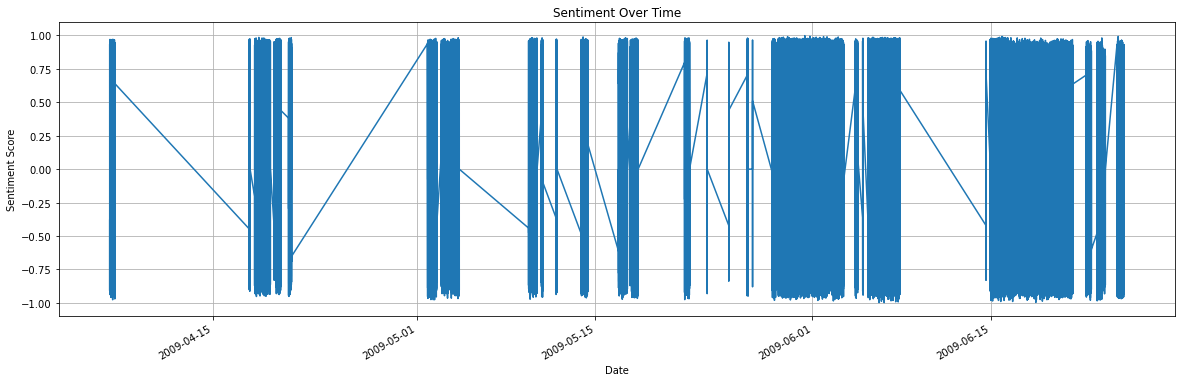

In [15]:
df['sentiment_score'].plot(figsize=(20, 6))
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

In [35]:
df['sentiment_score'].isna().sum()

0

In [10]:
#### DF DAILY

In [9]:
# Resample the data by day and aggregate using mean
df_daily = df['sentiment_score'].resample('D').mean().to_frame()

In [10]:
df_daily.head()

,sentiment_score
date,
2009-04-06,0.150989
2009-04-07,0.168514
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN


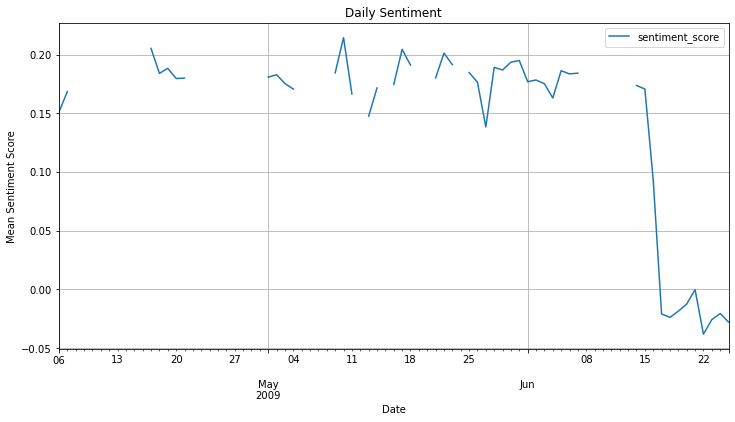

In [11]:
# Plot the daily sentiment data
df_daily.plot(figsize=(12, 6))
plt.title('Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()

In [12]:
df_daily['sentiment_score'].isna().sum()

33

In [14]:
df_daily.shape

(81, 1)

In [19]:
print("Missing dates:")
print(df_daily[df_daily['sentiment_score'].isna()].index)

Missing dates:
DatetimeIndex(['2009-04-08', '2009-04-09', '2009-04-10', '2009-04-11',
               '2009-04-12', '2009-04-13', '2009-04-14', '2009-04-15',
               '2009-04-16', '2009-04-22', '2009-04-23', '2009-04-24',
               '2009-04-25', '2009-04-26', '2009-04-27', '2009-04-28',
               '2009-04-29', '2009-04-30', '2009-05-05', '2009-05-06',
               '2009-05-07', '2009-05-08', '2009-05-12', '2009-05-15',
               '2009-05-19', '2009-05-20', '2009-05-24', '2009-06-08',
               '2009-06-09', '2009-06-10', '2009-06-11', '2009-06-12',
               '2009-06-13'],
              dtype='datetime64[ns]', name='date', freq=None)


In [20]:
df_daily.tail()

,sentiment_score
date,
2009-06-21,-0.000099
2009-06-22,-0.038058
2009-06-23,-0.025709
2009-06-24,-0.020431
2009-06-25,-0.027745


In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [33]:
def decompose(df):
    decomposition = seasonal_decompose(df, model='additive', period=7)
    
    plt.figure(figsize=(12, 10))
    plt.subplot(4, 1, 1)
    plt.plot(df, label='Original Time Series')
    plt.legend()
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend()
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residual (Noise)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [35]:
def stationarity(df):
    # Perform Augmented Dickey-Fuller test for stationarity
    result = sm.tsa.adfuller(df['sentiment_score'])

    # Print the ADF test results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'  {key}: {value}')

    # Interpret the ADF test results
    if p_value < 0.05:
        print("The time series is likely stationary (reject the null hypothesis)")
    else:
        print("The time series is likely non-stationary (fail to reject the null hypothesis)")

In [84]:
def autocorrelation(df):
    plt.figure(figsize=(12, 6))
    plot_acf(df['sentiment_score'], lags=7);
    plt.title('Autocorrelation Function (ACF) Plot')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show();

### Dealing with missing values
Evaluating options

### 1. Impute
#### Mean imputation

In [69]:
df_mean = (df_daily['sentiment_score'].fillna(df_daily['sentiment_score'].mean())).to_frame()

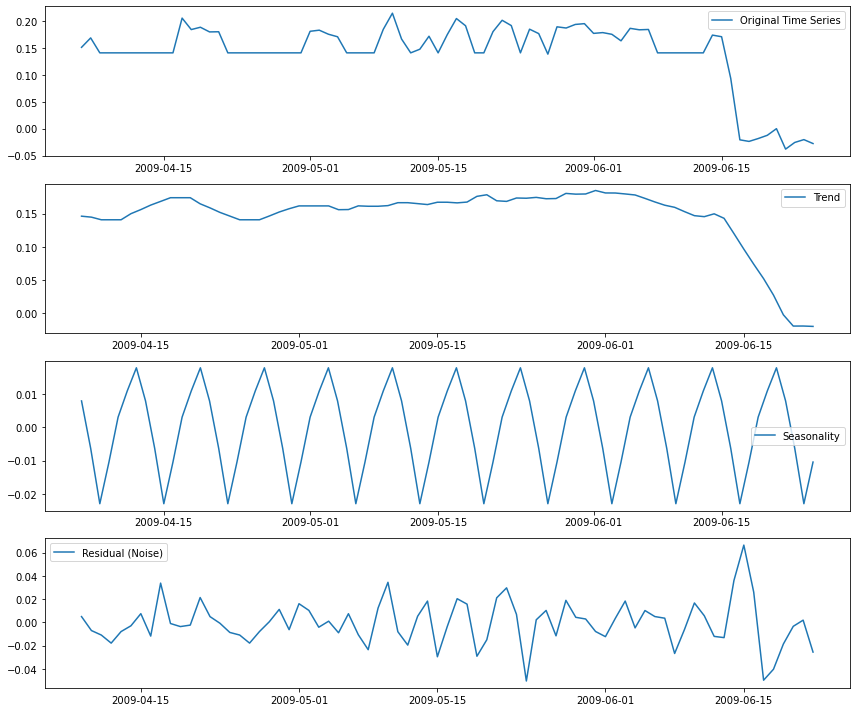

In [45]:
decompose(df_mean)

In [46]:
stationarity(df_mean)

ADF Statistic: -0.469525379335406
p-value: 0.8978274773410009
Critical Values:
  1%: -3.517113604831504
  5%: -2.8993754262546574
  10%: -2.5869547797501644
The time series is likely non-stationary (fail to reject the null hypothesis)


<Figure size 864x432 with 0 Axes>

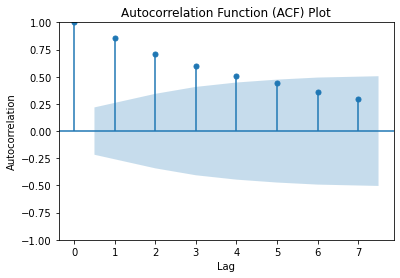

In [85]:
autocorrelation(df_mean)

#### Median imputation

In [86]:
df_median = (df_daily['sentiment_score'].fillna(df_daily['sentiment_score'].median())).to_frame()

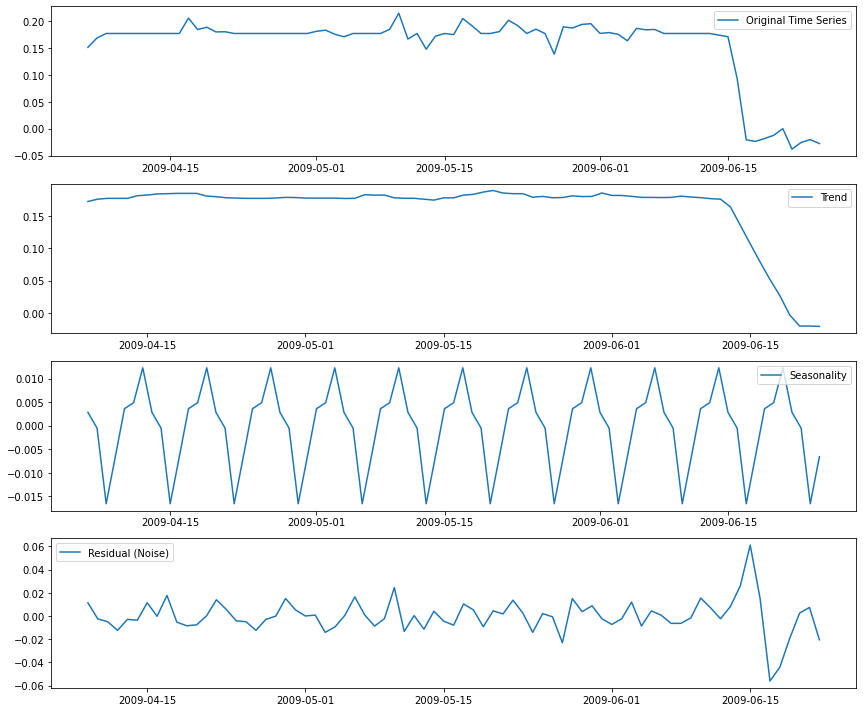

In [87]:
decompose(df_median)

In [50]:
stationarity(df_median)

ADF Statistic: -0.029049197742957944
p-value: 0.9560627852737714
Critical Values:
  1%: -3.5148692050781247
  5%: -2.8984085156250003
  10%: -2.58643890625
The time series is likely non-stationary (fail to reject the null hypothesis)


<Figure size 864x432 with 0 Axes>

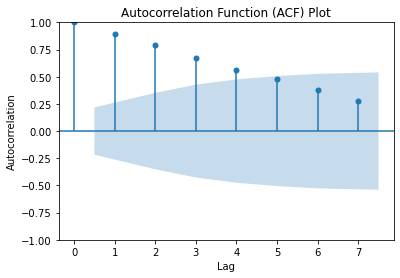

In [88]:
autocorrelation(df_median)

#### Forward Fill

In [89]:
df_ffill = (df_daily['sentiment_score'].fillna(method='ffill')).to_frame()

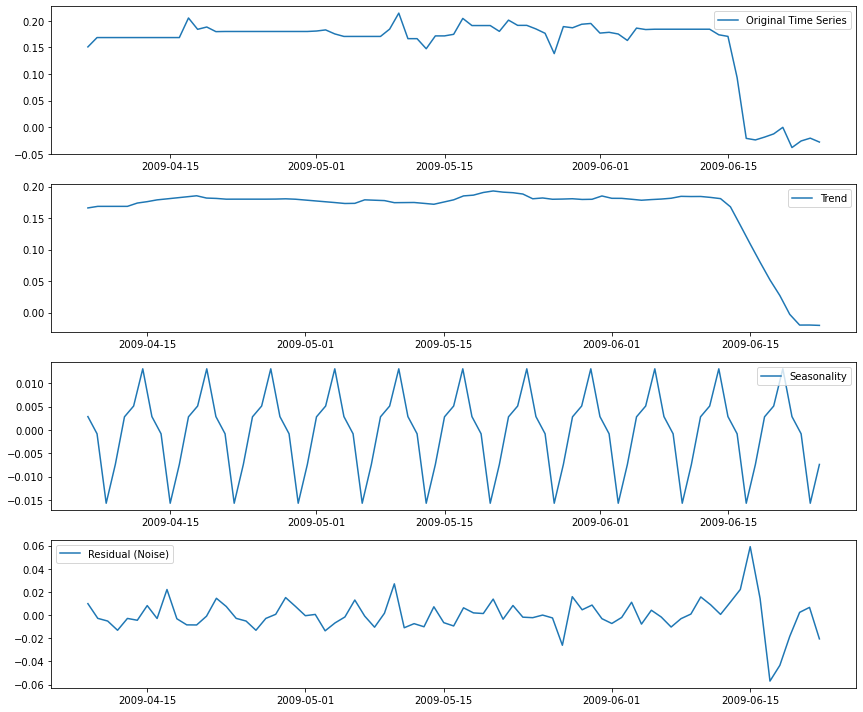

In [52]:
decompose(df_ffill)

In [53]:
stationarity(df_ffill)

ADF Statistic: -0.01207662619701571
p-value: 0.9575218894298305
Critical Values:
  1%: -3.5148692050781247
  5%: -2.8984085156250003
  10%: -2.58643890625
The time series is likely non-stationary (fail to reject the null hypothesis)


<Figure size 864x432 with 0 Axes>

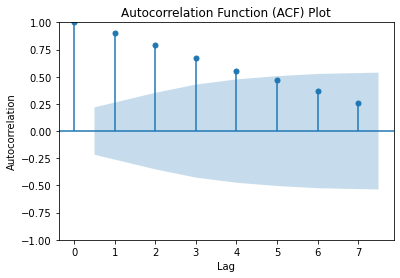

In [90]:
autocorrelation(df_ffill)

#### Backward Fill

In [91]:
df_bfill = (df_daily['sentiment_score'].fillna(method='bfill')).to_frame()

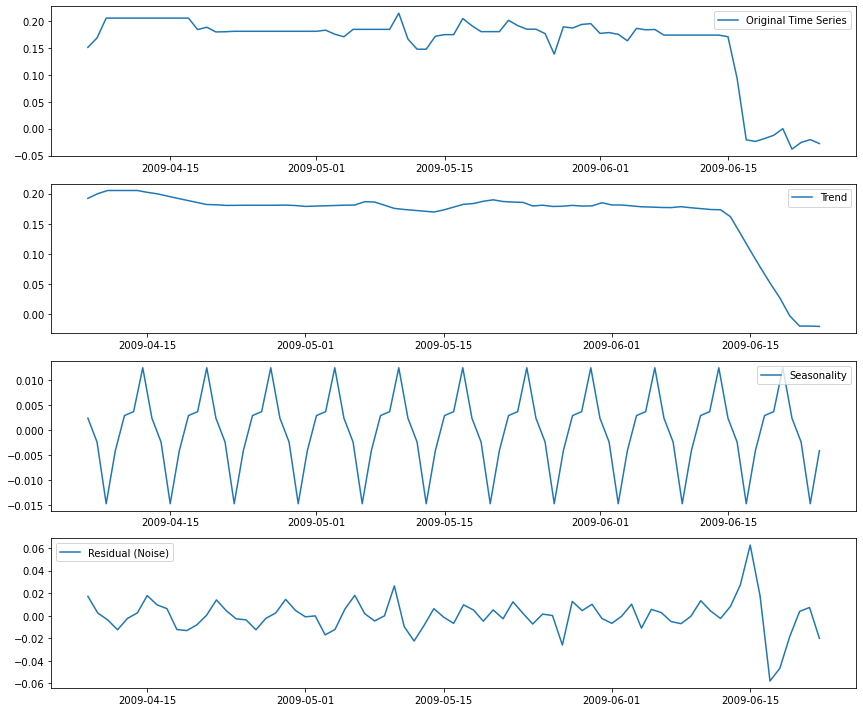

In [55]:
decompose(df_bfill)

In [92]:
stationarity(df_bfill)

ADF Statistic: 0.04262452694047966
p-value: 0.961918324361899
Critical Values:
  1%: -3.5148692050781247
  5%: -2.8984085156250003
  10%: -2.58643890625
The time series is likely non-stationary (fail to reject the null hypothesis)


<Figure size 864x432 with 0 Axes>

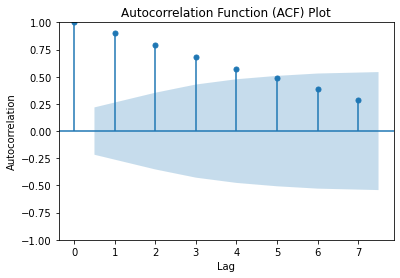

In [93]:
autocorrelation(df_bfill)

#### Interpolation

In [94]:
df_int = (df_daily['sentiment_score'].interpolate(method='linear')).to_frame()

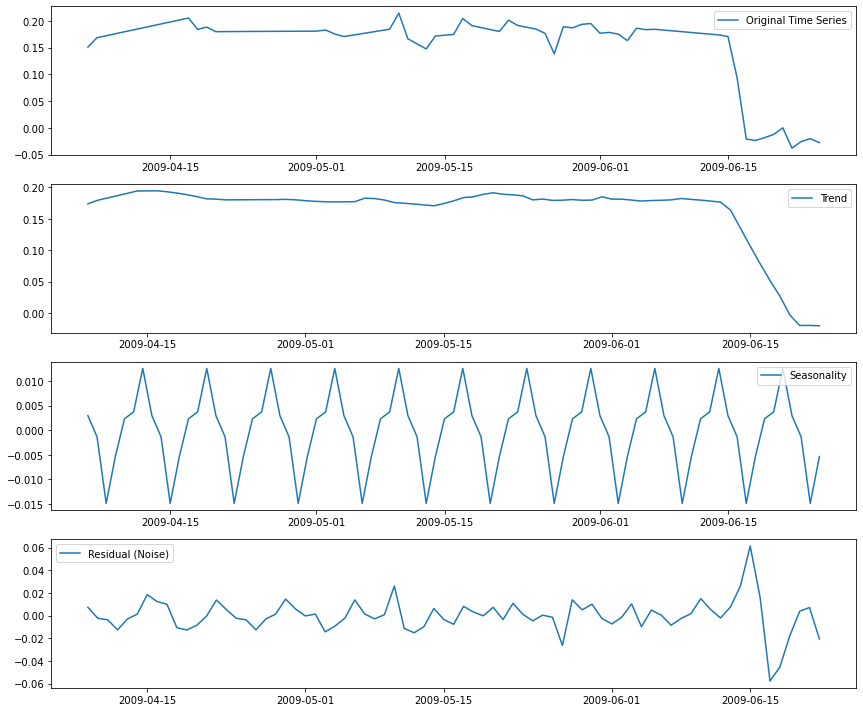

In [58]:
decompose(df_int)

In [59]:
stationarity(df_int)

ADF Statistic: 0.0937476799654404
p-value: 0.9656316175452033
Critical Values:
  1%: -3.5148692050781247
  5%: -2.8984085156250003
  10%: -2.58643890625
The time series is likely non-stationary (fail to reject the null hypothesis)


<Figure size 864x432 with 0 Axes>

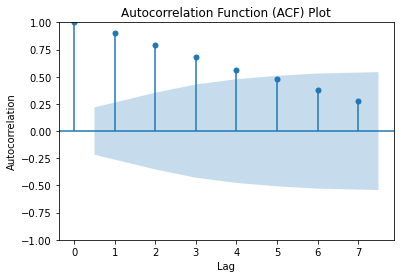

In [95]:
autocorrelation(df_int)

### 2. Delete

In [60]:
df_delete = df_daily.dropna()

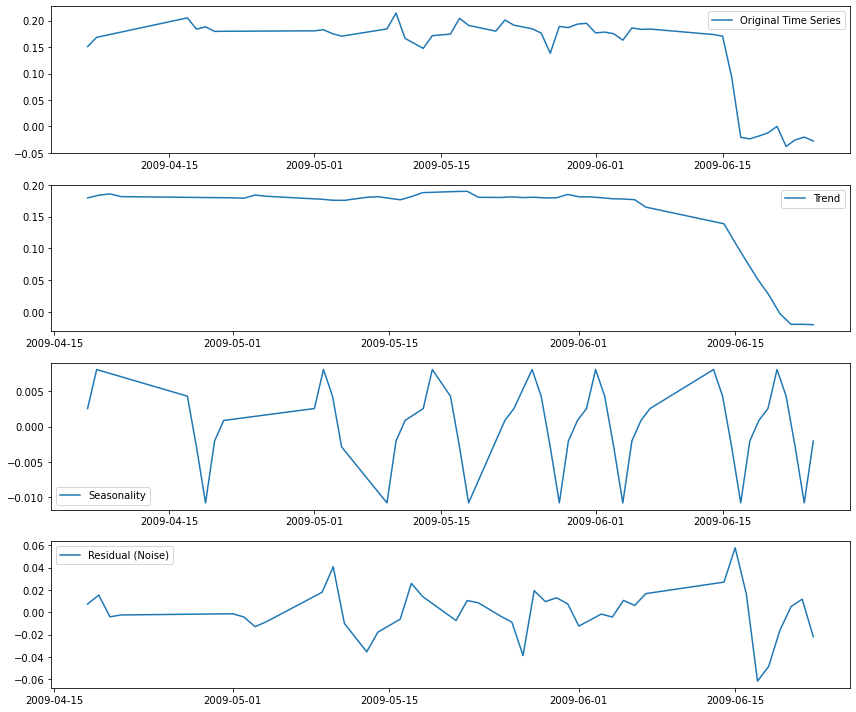

In [62]:
decompose(df_delete)

In [63]:
stationarity(df_delete)

ADF Statistic: -0.17536742051199083
p-value: 0.9413947695992524
Critical Values:
  1%: -3.5778480370438146
  5%: -2.925338105429433
  10%: -2.6007735310095064
The time series is likely non-stationary (fail to reject the null hypothesis)


<Figure size 864x432 with 0 Axes>

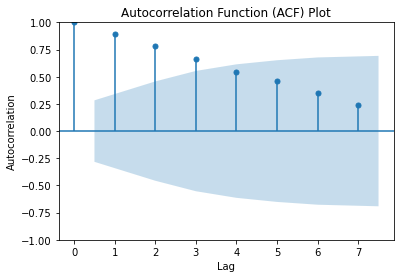

In [96]:
autocorrelation(df_delete)

### 3. Ignore

In [66]:
# we can't check seasonality and decompose a ts with NaN, df_daily will be used during the modeling phase

### Forecasting

In [12]:
import gc
gc.collect()

26

In [13]:
spark.catalog.clearCache()